# Regresión lineal - Primer informe para diplomado
## _Trabajo realizado por: Arturo Yesid González Peña_
### Fecha: Marzo 19 de 2020




# 1. Introducción
El siguiente ensayo tiene como próposito, brindar una conceptualización al método de regresión lineal. Para esto, se describirá los elementos más relevantes , desde la perspectiva histórica. Luego, se aterrizara los elementos matemáticos que desarrollan la regresión lineal, una aplicacion númerica desarrollada en python (con observaciones reales), la descripción de los resultados de la aplicación y finalmente, las concluiosnes.

Es importante aclarar, que este trabajo no busca entregar elementos exhaustivos de desarrollo matemático ni explorar las innumerables aplicaciones en las que ah tenido desarrollo esta estrategia de modelación. Es por naturaleza, un intento por contextualizar y enriquecer el conocimiento entorno a este método matematico-estadistico.

# 2. Historia

La formación de las nociones de correlación y regresión proviene, en gran parte, de estudios realizados en Biología, Biometría y Eugenesia. El primer autor que se interesa en el tema fue LambertAdolphe-Jacques Quetelet (1796-1874), conocido como Adolphe Quetelet, nacido en Gante, Bélgica. Obtuvo su doctorado en Matemáticas con una tesis sobre secciones cónicas, llegando a ser director del observatorio astronómico de Bruselas. Fue un hombre de gran energía, entusiasmo y talento organizativo que utilizó para crear varias instituciones internacionales. [A. Estepa et al, 2012](https://core.ac.uk/download/pdf/20343739.pdf)

Desde el punto de vista de la Estadística matemática se puede considerar a Galton como un ingenioso amateur, ya que, sin conocer los refinados métodos estadísticos de la época (usados, por ejemplo, por Laplace y Gauss) y por medio de investigaciones empíricas, estudia la variabilidad de características humanas. Desarrolla sus propios y rudimentarios métodos para describir observaciones
univariadas y bivariadas normalmente distribuidas, explicando la utilidad y el significado de la regresión y correlación, no solamente en el contexto de la herencia, sino en general.

Las ideas modernas sobre regresión se originan en los trabajo de Legendre y Gauss, sobre el método de mínimos cuadrados, para ajustar los datos sobre las órbitas de cuerpos celestes. El primer estudio documentado sobre el método de mínimos cuadrados, de donde deriva la idea de regresión, es debido a Legendre (1752-1833) en 1805.

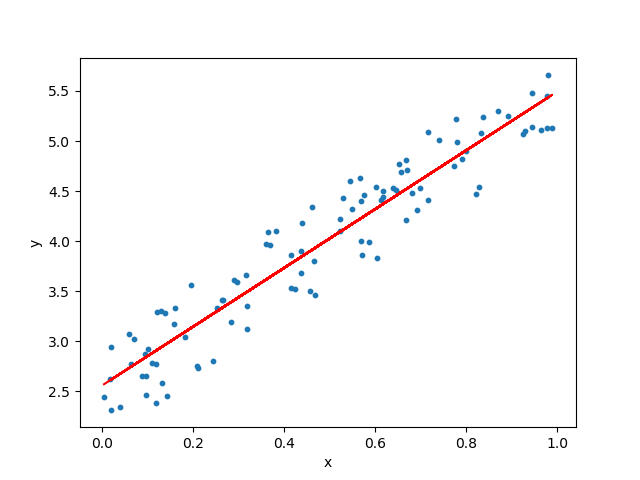

[Fuente:](https://towardsdatascience.com/everything-you-need-to-know-about-linear-regression-b791e8f4bd7a)

A lo largo del siglo XIX el trabajo de los estadísticos era mayormente descriptivo; la inferencia estadística se va a desarrollar como consecuencia de la creación de la Escuela Biométrica del University College de Londres bajo la dirección del matemático Karl Pearson (1857-1936), quien trata de aportar bases matemáticas a los descubrimientos de Galton.

# 3. Planteamiento del algoritmo

El problema que vamos abordar es la utilización del método de regresión lineal con datos inventados y posteriormente ver la validez de está metodología con el uso de datos reales. En particular, vamos a determinar la relación existente entre los inventarios de crudo en Cushing Oklahoma y el precio de petróleo de referencia WTI (West Texas Intermediate).


# 4. Aplicación regresión lineal

El siguiente código se implementa una regresión lineal. Este ejercicio esta dividido en dos partes. La primera se hara un seguimiento de implementación en python descrita siguiendo la página web de [realpython](https://realpython.com/linear-regression-in-python/) añadiendo más datos.

La segunda parte, es la implementación de una regresión lineal con una aplicación a los mercados financiero sobre el precio del mercado de petróleo de referncia de _WTI_. Esta aplicación busca brindar un hallazgo de la relación inversa que existe entre los niveles de inventario en EE.UU y los precios del crudo de esta referncia por barril 

## 4.1 Desarrollo aplicación siguiendo ejemplo de _realpython_

En esta instrucción se hacen el lamado de las librerias, se crean los datos y se crea la instacia de regresión lineal

In [2]:
# Importación de elementos de libreria para estimación de regresión lineal
import numpy as np
from sklearn.linear_model import LinearRegression

# Creación de datos ficticios para desarrollo de método de regresión
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))  # Esta sentencia crea los datos como una matriz de n-filas x 1-columna
y = np.array([5, 20, 14, 32, 22, 38])        
print(x)
print(y)
modelo1 = LinearRegression()

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


Dado que se crea una clase llamada _LinearRegression()_, esto es un objeto que tiene inmerso distintas funcionalidades como por ejemplo:
- _fit_intercept_ que es un booleano (por defecto True) que permite la estimación del término constante (intercepto) en la regresión.

- _normalize_ Booleano (por defecto False) función para normalizar o no las entradas de la regresión.
- _copy_X_ Booleano (por defecto True) si se requiere que se coipien los datos de entrada (True) o descartarlos (False)
- _n_jobs_ para definir el número de procesadores en paralelo que se requieren para ejecutar la estimación.

In [3]:
# estimación del modelo
modelo1 = modelo1.fit(x, y)

# o directamente
modelo1 = LinearRegression().fit(x, y)

# imprimir algunos resultados
print('Intercepto:', modelo1.intercept_)
print('Coeficiente:', modelo1.coef_)

Intercepto: 5.633333333333329
Coeficiente: [0.54]


Importante mencionar, que el término constante (intercepto) es un escalar y el coeficiente es un arreglo. La interpretación de estos valores dependerá de la plicación real que se le dé. Sin embargo, es una costumbre mencionar que el valor del intercepto $b_{0}$ es la constante a la cual tendrá el modelo cuando $x=0$, mientras $b_{1}=0.54$ se asocia a que un incremento de una unidad en $x$ registraría un incremento de 0.54 en la respuesta $y$. No obstante, es una interpretación sobre-simplificada de la interpretación del valor de estas estimaciones.

Otra manera funcional para estimar está sencilla regresión lineal es la siguiente que se obtiene los mismos resultados, pero la clase de datos de salida de estimación son diferentes

In [4]:
modelo2 = LinearRegression().fit(x, y.reshape((-1, 1)))
print('Intercepto:', modelo2.intercept_)
print('Coeficiente:', modelo2.coef_)

Intercepto: [5.63333333]
Coeficiente: [[0.54]]


Ahora, para calcular los valores de los estimados de la regresión y contrastarlo con los valores reales se realiza de la siguiente manera:

In [5]:
y_fitted = modelo1.intercept_ + modelo1.coef_ * x
print(y)
print(y_fitted)
y_fitted2 = modelo1.intercept_ + modelo1.coef_ * x.flatten()
#print(y)
print(y_fitted2)
print('Diferencia datos reales y predichos:', y-y_fitted2)

[ 5 20 14 32 22 38]
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
Diferencia datos reales y predichos: [-3.33333333  6.26666667 -5.13333333  7.46666667 -7.93333333  2.66666667]


Finalmente, otra manera es estimar pobibles valores de $y$ a partir de npumeros distintos de $x$ se puede lograr de la siguiente forma:

In [6]:
x_nuevo = np.arange(50).reshape((-1, 1))
#print(x_nuevo)
y_nuevo = modelo1.predict(x_nuevo)
print(y_nuevo)

[ 5.63333333  6.17333333  6.71333333  7.25333333  7.79333333  8.33333333
  8.87333333  9.41333333  9.95333333 10.49333333 11.03333333 11.57333333
 12.11333333 12.65333333 13.19333333 13.73333333 14.27333333 14.81333333
 15.35333333 15.89333333 16.43333333 16.97333333 17.51333333 18.05333333
 18.59333333 19.13333333 19.67333333 20.21333333 20.75333333 21.29333333
 21.83333333 22.37333333 22.91333333 23.45333333 23.99333333 24.53333333
 25.07333333 25.61333333 26.15333333 26.69333333 27.23333333 27.77333333
 28.31333333 28.85333333 29.39333333 29.93333333 30.47333333 31.01333333
 31.55333333 32.09333333]


## 4.2 Aplicación real con _sklearn_ para inventarios de crudo y precio de petróleo de referencia *WTI*

La formación de precios del petróleo está influenciada por razones fundamentales (crecimiento económico, mayor movilidad, incremento en la demanda por mayor disposición a viajar, entre otras), y razones financieras, o especulativas subyacente de los mercados financieros.

En este sentido, entender los distintos _driver_ de este mercado nos brindará mayor entendimiento de las fluctuaciones de este mercado. En este ejemplo, nos centraremos en a interacción de los niveles de inventario y el precio del petróleo. Algunos analistas de este mercado relacionan esta intereacción como la curvade rendimientos de este _commodity_ (Vease: [Art Bertman](https://www.artberman.com/))

Antes de iniciar nuestro analísis, lo primero que conviene señalar es al relación del nivel de inventarios y los precios que han ocurrido en la última decada. En la siguiente gráfica se puede ver está relación desde 2015 hasta lo corrido de 2021.


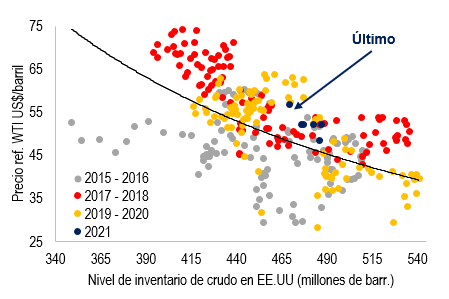

Fuente: [EIA-STEO](https://www.eia.gov/outlooks/steo/#:~:text=EIA%20forecasts%20that%20global%20consumption,average%20101.3%20million%20b%2Fd.), Elaboración propia

Como se puede apreciar en la figura existe una relación inversa entre los inventarios y el nivel de precios del petróleo. Por tanto, se procede a montar un modelo lineal para representar esta relación inversa.

In [7]:
import numpy as np
import matplotlib.pyplot as plt  # Para visualizar
import pandas as pd  # para realizar la lectura de los datos
from sklearn.linear_model import LinearRegression

data = pd.read_csv('inventarios_wti.csv')  # Cargar datos de entrada
print(data)
Inventarios = data.iloc[:, 1].values.reshape(-1, 1)  # Conversión de datos en arreglos
#print(Inventarios)
WTI = data.iloc[:, 2].values.reshape(-1, 1)    # -1 significa que será un arreglo por filas, con una (1) columna
#print(WTI)

     42006  348.806  52.69
0    42013  354.195  48.36
1    42020  364.266  48.69
2    42027  373.140  45.59
3    42034  379.473  48.24
4    42041  383.800  51.69
..     ...      ...    ...
313  44204  482.211  52.24
314  44211  486.563  52.36
315  44218  476.653  52.27
316  44225  475.659  52.20
317  44232  469.014  56.87

[318 rows x 3 columns]


Estimación del modelo

Intercepto: [124.30225373]
Coeficiente: [[-0.15888023]]


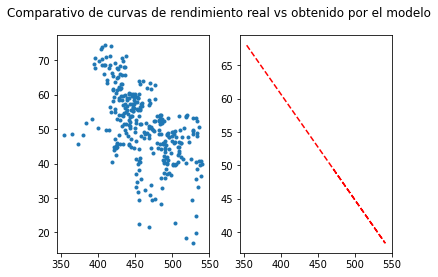

In [31]:
Modelo3 = LinearRegression()            # Se crea un objeto de regresión (la instancia)
LinearRegression().fit(Inventarios, WTI)  # Estima la regresión WTI_t = b0 + b1*Inventarios + e_t
Modelo3 = LinearRegression().fit(Inventarios, WTI.reshape((-1, 1)))
print('Intercepto:', Modelo3.intercept_)
print('Coeficiente:', Modelo3.coef_)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparativo de curvas de rendimiento real vs obtenido por el modelo')
ax1.plot(Inventarios, WTI, '.')
ax2.plot(Inventarios, Modelo3.coef_*Inventarios + Modelo3.intercept_, 'r--')

#plt.plot(WTI, Modelo3.coef_*Inventarios + Modelo3.intercept_)
#plt.plot(Inventarios='Inventarios', WTI='WTI US$ /barril', style='o')
#plt.title('Curva de rendimiento WTI')
#plt.show()

## 4.3 Desarrollo de algoritmo para determinación de mejor modelo

En esta sección utilizaremos lo aprendido en clase del diplomado para la determinación del modelon para la estimación de parametros.

In [32]:
from scipy.optimize import curve_fit

Inven,Petro = data.iloc[:,1],data.iloc[:, 2]
print(Inven,Petro)

# Definición del modelo
def modelito(x,a,b):
    return a+b*x

# usar la función curve_fit para la estimación de perámetros
pars,_ = curve_fit(modelito,Inven,Petro)

# Observar los pesos
print(pars)


0      354.195
1      364.266
2      373.140
3      379.473
4      383.800
        ...   
313    482.211
314    486.563
315    476.653
316    475.659
317    469.014
Name: 348.806, Length: 318, dtype: float64 0      48.36
1      48.69
2      45.59
3      48.24
4      51.69
       ...  
313    52.24
314    52.36
315    52.27
316    52.20
317    56.87
Name: 52.69, Length: 318, dtype: float64
[124.30225332  -0.15888023]


Gráficar las estimaciones obtenidas a traves de _curve_fit_

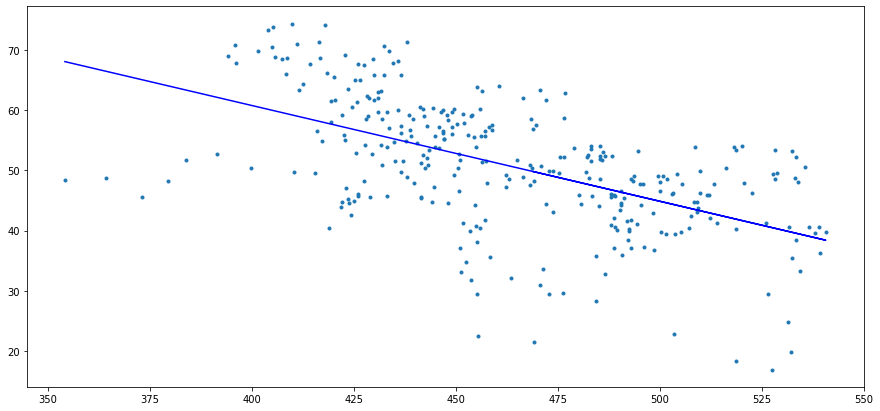

In [33]:
plt.figure(figsize=(15,7))
plt.plot(Inven,Petro,'.')
plt.plot(Inven,modelito(Inven,*pars),'b-')
plt.show()

# 5. Conclusiones

Con este modesto ejercicio se pudo implementar el uso de los distintos métodos para la estimación de parametros de una regresión lineal sencilla. Desde un ejemplo con números aleatorios, hasta implementar el mismo procedimiento con dos métodos sobre los datos de de inventarios de crudo y precio del WTI

# Referencias
- https://www.tandfonline.com/doi/pdf/10.1080/10691898.2001.11910537
- https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
- https://core.ac.uk/download/pdf/20343739.pdf
- Cuadernos de documentacicón Diplomado de inteligencia artificial y aprendizaje de máquina Universidad Nacional de Colombia. Profesores Montenegro (2021)